### 1. Importing Libraries.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

# EDA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import matplotlib.patheffects as path_effects
from matplotlib import colors
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

from sklearn.cluster import AgglomerativeClustering

#Sweetviz report
import sweetviz as sv

# Pandas profile
from pandas_profiling import ProfileReport

# Avoid warnings
import warnings
warnings.simplefilter("ignore")

### 2. Loading the data set

In [2]:
# Load data
df = pd.read_csv("marketing_campaign.csv", sep = "\t")

# Information about the data set

People
●	ID: Customer's unique identifier
●	Year_Birth: Customer's birth year
●	Education: Customer's education level
●	Marital_Status: Customer's marital status
●	Income: Customer's yearly household income
●	Kidhome: Number of children in customer's household
●	Teenhome: Number of teenagers in customer's household
●	Dt_Customer: Date of customer's enrollment with the company
●	Recency: Number of days since customer's last purchase
●	Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
●	MntWines: Amount spent on wine in last 2 years
●	MntFruits: Amount spent on fruits in last 2 years
●	MntMeatProducts: Amount spent on meat in last 2 years
●	MntFishProducts: Amount spent on fish in last 2 years
●	MntSweetProducts: Amount spent on sweets in last 2 years
●	MntGoldProds: Amount spent on gold in last 2 years

Promotion
●	NumDealsPurchases: Number of purchases made with a discount
●	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
●	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
●	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
●	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
●	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
●	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
●	NumWebPurchases: Number of purchases made through the company’s website
●	NumCatalogPurchases: Number of purchases made using a catalogue
●	NumStorePurchases: Number of purchases made directly in stores
●	NumWebVisitsMonth: Number of visits to company’s website in the last month

### 3. EDA

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
df.shape

(2240, 29)

### Pandas Profile Report:

In [5]:
# pr = ProfileReport(df)
# pr

In [6]:
# # report by sweetviz

# my_report = sv.analyze(df)
# my_report.show_html()

In [7]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2038   6568        1984  Graduation        Married  38680.0        1   
504   10160        1956      Master       Together  50943.0        0   
1119   2320        1978    2n Cycle        Married  47025.0        0   
1584   4608        1987  Graduation       Divorced  81361.0        0   
1305   5841        1966  Graduation       Together  60894.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2038         0  28-03-2013       97        11  ...                  7   
504          1  21-06-2013       49        31  ...                  5   
1119         1  12-09-2013       98       508  ...                  9   
1584         0  25-02-2014       18       163  ...                  1   
1305         1  28-06-2013       61       606  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2038             0             0             0             0             0   
504              0             0             0             0             0   
1119             0             0             0             0             0   
1584             0             0             0             0             0   
1305             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2038         0              3         11         0  
504          0              3         11         0  
1119         0              3         11         0  
1584         0              3         11         1  
1305         0              3         11         0  

[5 rows x 29 columns]

In [8]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1611   1773        1978    2n Cycle        Married  12393.0        0   
1932   1458        1982      Master        Married  21059.0        1   
938    3673        1971  Graduation         Single  55239.0        0   
1711   7832        1959      Master        Married  77520.0        0   
1299  10641        1978  Graduation         Single   7500.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1611         0  04-12-2012       38         5          6               15   
1932         0  07-01-2014       40         8          3               19   
938          1  14-07-2013       59       371         17              238   
1711         1  28-08-2013       30       940         44              396   
1299         1  27-12-2012        5         6          5                4   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1611               11                 7            13                  1   
1932                3                 3             8                  3   
938                23                24           106                  3   
1711                0                88            58                  1   
1299               13                 4            25                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1611                2                    0                  3   
1932                3                    0                  3   
938                 7                    5                 11   
1711                8                    7                  7   
1299                2                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1611                  9             0             0             0   
1932                  6             0             0             0   
938                   5             0             0             0   
1711                  4             1             0             1   
1299                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
1611             0             0         0              3         11         0  
1932             0             0         0              3         11         0  
938              0             0         0              3         11         0  
1711             1             0         0              3         11         1  
1299             0             0         0              3         11         0

In [10]:
options = ['Graduation' ,'PhD'] 
    
# selecting rows based on condition 
rslt_df = df[(df['ID'] == 4141) & 
          df['Education'].isin(options)] 
    
print('\nResult dataframe :\n',
      rslt_df)


Result dataframe :
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
2  21-08-2013       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
2                21            42                  1                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
2                    2                 10                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
2              3         11         0  


In [11]:
def basic_info(df):
    print("This dfset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dfset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dfset: ")
    print(" ")
    print(df.describe())
    print(" ")
    print("Information about this dfset: ")
    print(" ")
    print(df.info())

In [12]:
basic_info(df)

This dfset has  29  columns and  2240  rows.
This dfset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dfset: 
 
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.9357

In [13]:
df.median()

ID                      5458.5
Year_Birth              1970.0
Income                 51381.5
Kidhome                    0.0
Teenhome                   0.0
Recency                   49.0
MntWines                 173.5
MntFruits                  8.0
MntMeatProducts           67.0
MntFishProducts           12.0
MntSweetProducts           8.0
MntGoldProds              24.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        2.0
NumStorePurchases          5.0
NumWebVisitsMonth          6.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Z_CostContact              3.0
Z_Revenue                 11.0
Response                   0.0
dtype: float64

In [14]:
df_copy = df.copy()

In [15]:
# Divide the data into two dataframes: one has income values, and the other doesn't.
have_income = df_copy[df_copy.Income.isnull()== False]
missing_income = df_copy[df_copy.Income.isnull()== True]

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [17]:
# Convert the one that has income to int type
have_income.Income = have_income.Income.astype('int64')

# Give a string value of "0" to missing value, then we can convert it into int type
missing_income.Income = str(have_income.Income.median())

# Coverting String and Float dtypes to int dtype
missing_income.Income = missing_income.Income.str.replace(".5", "")
missing_income.Income = missing_income.Income.astype('int64')

In [18]:
# Combine the data
df_copy = missing_income.append(have_income)

In [19]:
options = ['Graduation' ,'PhD','2n Cycle','Master'] 
    
# selecting rows based on condition 
rslt_df = df_copy[(df_copy['ID'] == 5250) & 
          df_copy['Education'].isin(options)] 
    
print('\nResult dataframe :\n',
      rslt_df)


Result dataframe :
         ID  Year_Birth Education Marital_Status  Income  Kidhome  Teenhome  \
2084  5250        1943    Master          Widow   51381        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2084  30-10-2013       75       532        126              490   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2084              164               126           126                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2084                5                    5                 11   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2084                  1             0             0             1   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2084             0             0         0              3         11         1  


In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 10 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWe

#### 3.1 Issue regarding date 

In [21]:
# This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.
df_copy.Dt_Customer = pd.to_datetime(df_copy.Dt_Customer)

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 10 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nu

#### 3.2 Reset the index

In [23]:
# Reset the index
df_1 = df_copy.reset_index(drop=True)

In [24]:
df_1.sample(5)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
2060  10509        1955      Master         Single   36927        1         1   
283    2379        1953  Graduation         Single   69267        0         0   
662    6728        1985  Graduation       Together   29103        1         0   
561    4279        1963    2n Cycle         Single   39548        1         1   
382   10313        1975  Graduation        Married   48178        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2060  2014-02-06       46        51          0               16   
283   2012-09-22       31       778         44              499   
662   2012-08-27       38        16          0               17   
561   2014-03-31       87        15          4               10   
382   2012-10-28       69       159          4               45   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2060                0                 0             4                  2   
283                95                73           146                  2   
662                 6                 3             6                  2   
561                 3                 4            18                  2   
382                 6                 2            38                  6   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2060                3                    0                  3   
283                 3                    4                  5   
662                 1                    0                  3   
561                 1                    1                  3   
382                 5                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2060                  8             0             0             0   
283                   7             0             0             0   
662                   9             0             0             0   
561                   3             0             0             0   
382                   8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2060             0             0         0              3         11         0  
283              0             0         0              3         11         1  
662              0             0         0              3         11         0  
561              0             0         0              3         11         0  
382              0             0         0              3         11         0

In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### 3.3 Visualizations

#### 3.3.1 Finding and treating the outliers

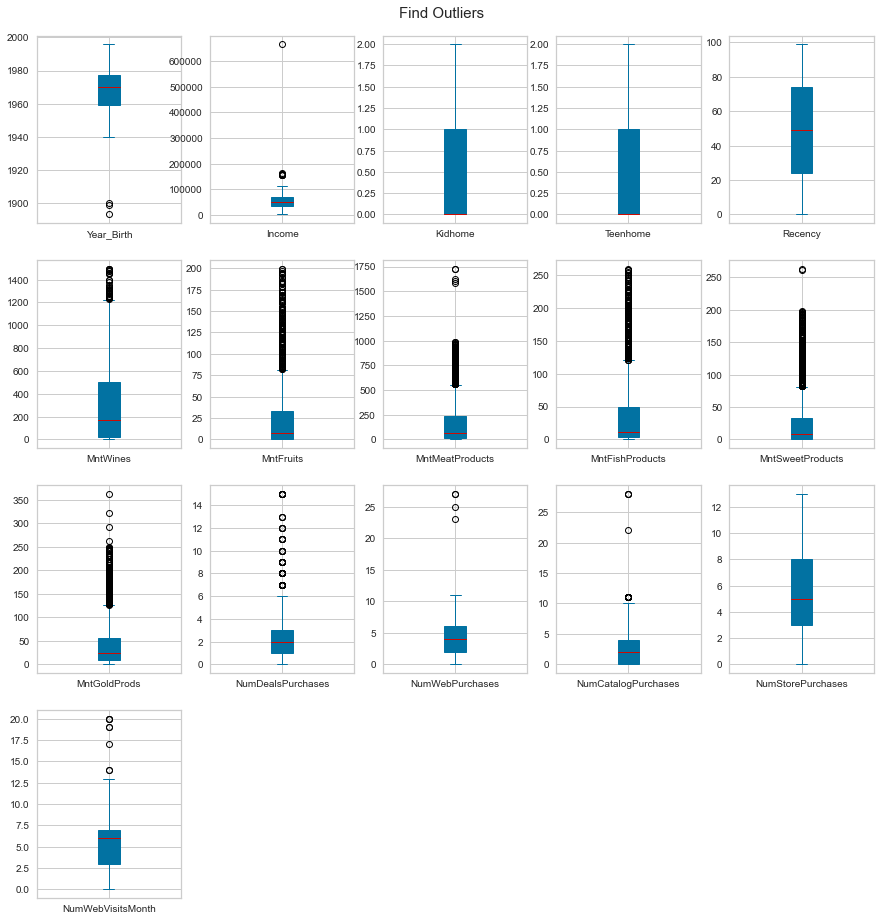

In [26]:
# select columns to plot
# Dropping the categorical columns/ un-useful columns(ID) --> to plot outliers
df_1_to_plot = df_1.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain','Z_CostContact','Z_Revenue']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_1_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

#### Treating outliers (using emperical formula (µ - 3σ) )

In [27]:
df_1.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [28]:
# Remove outliers in year_birth -->(µ - 3σ)

df_1 = df_1[df_1.Year_Birth >= (df_1.Year_Birth.mean()-3*df_1.Year_Birth.std())]
df_1.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

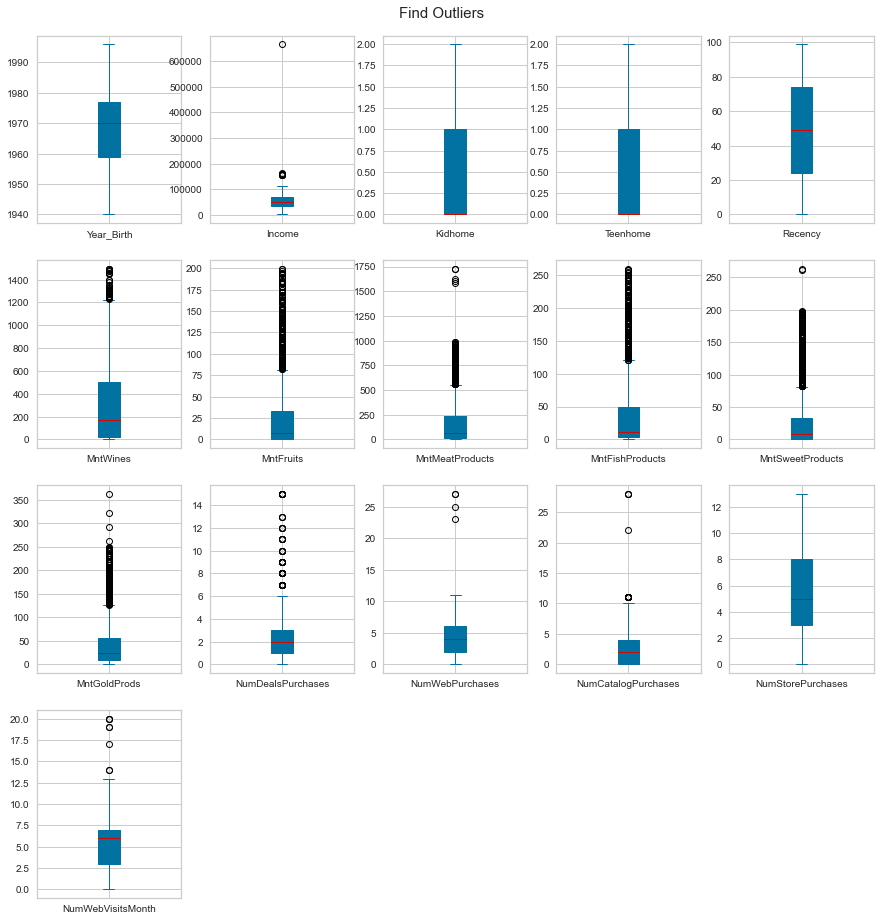

In [29]:
# Outliers after treating on them
df_1_to_plot = df_1.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain','Z_CostContact','Z_Revenue']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_1_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

In [30]:
#Dropping some of the redundant features
to_drop = ["Z_CostContact", "Z_Revenue"]
df_1 = df_1.drop(to_drop, axis=1)

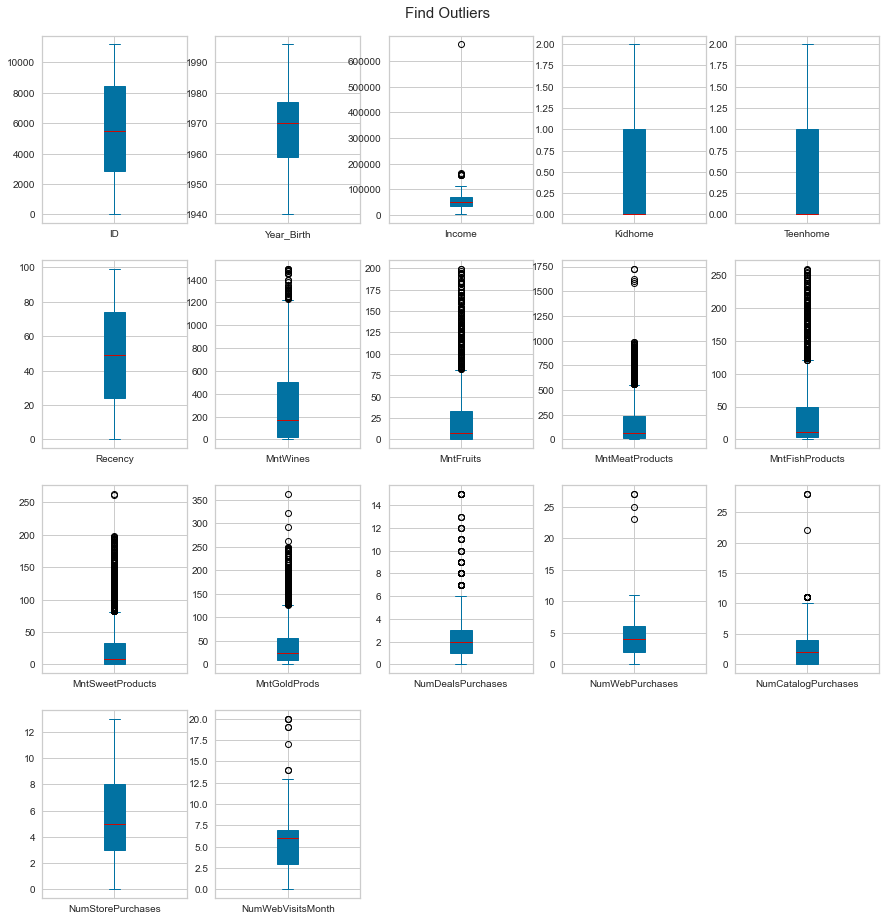

In [31]:
# Outliers after treating on them
df_2_to_plot = df_1.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_2_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

In [32]:
#Dropping the outliers by setting a cap on income. 
df_1 =df_1[(df_1["Income"]<600000)]
print("The total number points after removing the outliers are:", len(df_1))

The total number points after removing the outliers are: 2236


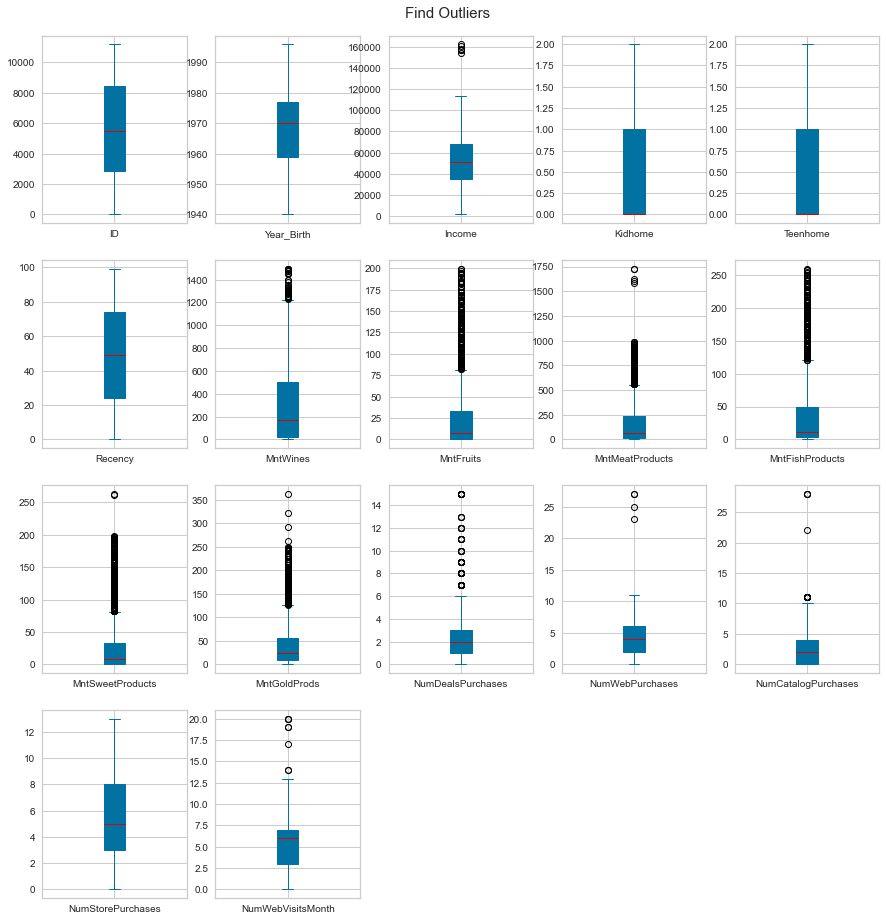

In [33]:
# Outliers after treatting on them
df_2_to_plot = df_1.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_2_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

In [34]:
df_1.sample(5)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
459   2541        1976  Graduation        Married   24027        1         0   
78    8375        1968         PhD        Married   55954        0         1   
1761  2154        1971  Graduation          Widow   30372        1         1   
2002  6815        1980    2n Cycle        Married   96547        0         0   
126   7431        1991         PhD         Single   68126        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
459   2013-09-06        7        14          7               11   
78    2014-03-03       63       447          0               28   
1761  2012-12-25       33        15          0               12   
2002  2014-05-23        4       448         21              125   
126   2012-10-11       40      1332         17              311   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
459                11                 0             5                  2   
78                  0                 0            43                  3   
1761                7                 3             7                  3   
2002               52               101            62                  0   
126                23                51            86                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
459                 2                    0                  3   
78                  8                    2                  6   
1761                2                    0                  3   
2002                7                    6                  8   
126                 7                    4                  5   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
459                   8             0             0             0   
78                    7             0             0             0   
1761                  7             0             0             0   
2002                  2             1             0             1   
126                   9             0             1             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
459              0             0         0         0  
78               0             0         0         0  
1761             0             0         0         0  
2002             1             0         0         1  
126              0             0         0         1

In [35]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   int64         
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-nul

<AxesSubplot:>

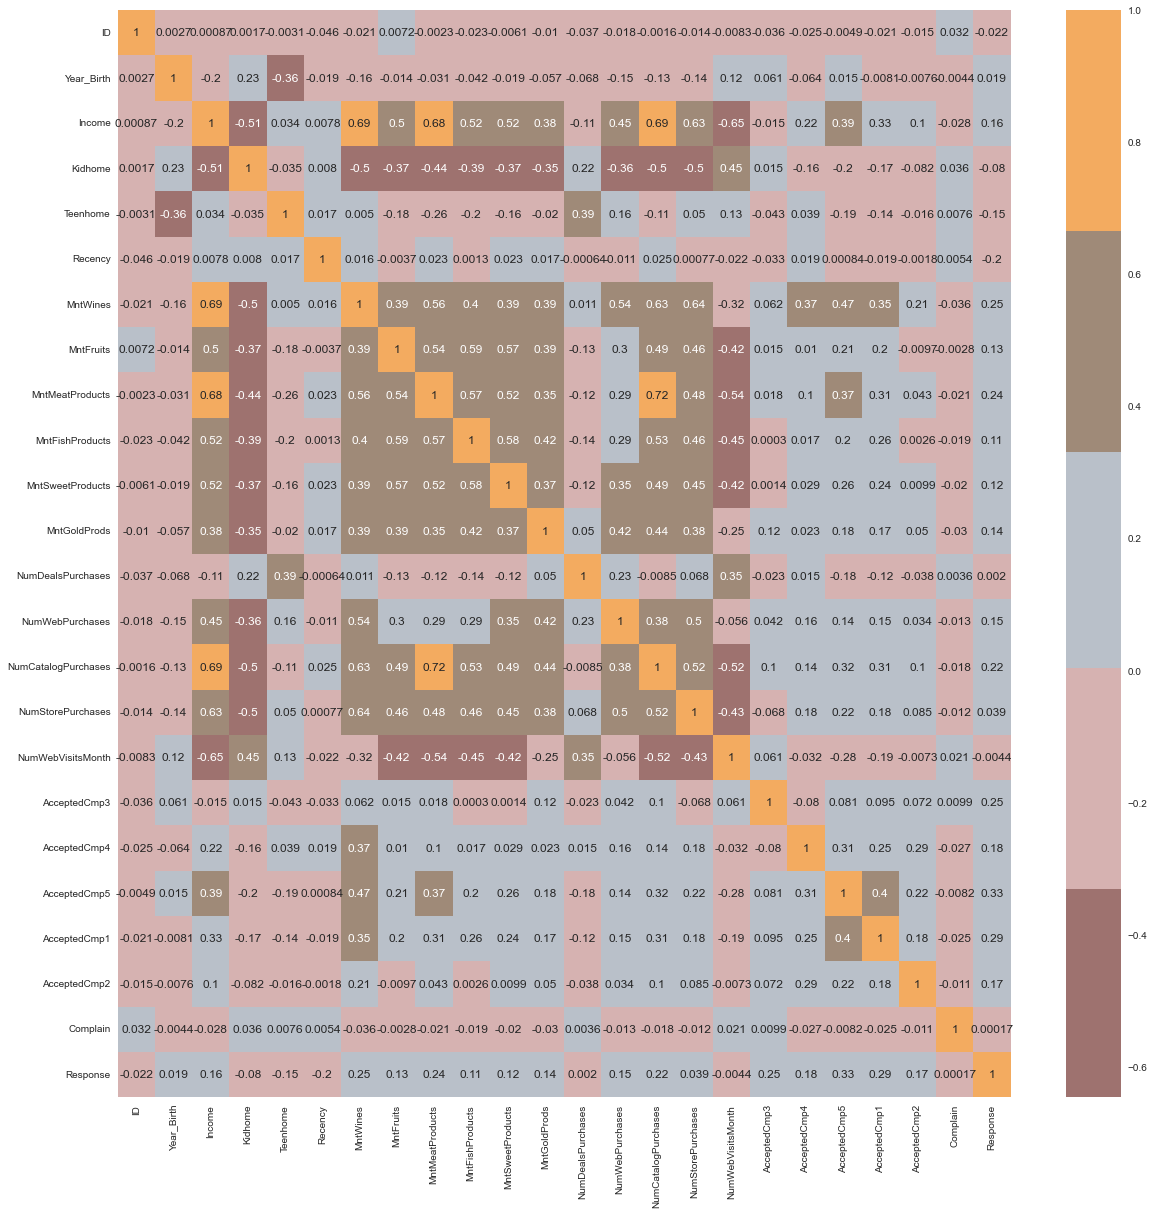

In [36]:
#correlation matrix

cmap =ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

corrmat= df_1.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [37]:
# Run discriptive statistics of numerical datatypes.
df_1.describe(include = ['float64','int64'])

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2236.000000  2236.000000    2236.000000  2236.000000  2236.000000   
mean    5589.008497  1968.898032   51952.608676     0.444097     0.506708   
std     3244.826887    11.703281   21411.466994     0.538459     0.544609   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35502.500000     0.000000     0.000000   
50%     5454.500000  1970.000000   51381.000000     0.000000     0.000000   
75%     8421.750000  1977.000000   68275.750000     1.000000     1.000000   
max    11191.000000  1996.000000  162397.000000     2.000000     2.000000   

           Recency    MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2236.000000  2236.00000  2236.000000      2236.000000      2236.000000   
mean     49.116279   304.12746    26.275939       166.983453        37.536225   
std      28.957284   336.59181    39.724007       225.689645        54.648562   
min       0.000000     0.00000     0.000000         0.000000         0.000000   
25%      24.000000    24.00000     1.000000        16.000000         3.000000   
50%      49.000000   174.00000     8.000000        67.000000        12.000000   
75%      74.000000   504.25000    33.000000       232.000000        50.000000   
max      99.000000  1493.00000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2236.000000   2236.000000        2236.000000      2236.000000   
mean          27.080501     43.983005           2.326029         4.087657   
std           41.299504     52.061568           1.933032         2.779988   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.000000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2236.000000        2236.000000        2236.000000   
mean              2.663238           5.795617           5.318873   
std               2.923898           3.251129           2.426886   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2236.000000   2236.000000   2236.000000   2236.000000   2236.000000   
mean       0.072898      0.074687      0.072451      0.064401      0.013417   
std        0.260027      0.262944      0.259291      0.245520      0.115077   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Complain     Response  
count  2236.000000  2236.000000  
mean      0.008945     0.149374  
std       0.094173     0.356536  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

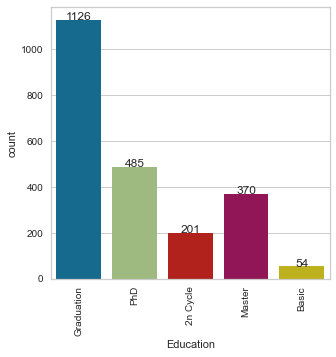

In [38]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Education', data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

#### 3.3.2 Analysis -->
a) Uni-Variate Analysis
b) Bi-Variate Analysis
c) Multi-Variate Analysis

In [39]:
#Feature Engineering
#Age of customer today 
df_1["Age"] = 2021-df_1["Year_Birth"]

#Total spendings on various items
df_1["Total_Spent"] = df_1["MntWines"]+ df_1["MntFruits"]+ df_1["MntMeatProducts"]+ df_1["MntFishProducts"]+ df_1["MntSweetProducts"]+ df_1["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df_1["Living_With"]=df_1["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df_1["Children"]=df_1["Kidhome"]+df_1["Teenhome"]

#Feature for total members in the householde
df_1["Family_Size"] = df_1["Living_With"].replace({"Alone": 1, "Partner":2})+ df_1["Children"]

#Feature pertaining parenthood
df_1["Is_Parent"] = np.where(df_1.Children> 0, 1, 0)

#Segmenting education levels in three groups
df_1["Education"]=df_1["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df_1=df_1.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})



In [40]:
df_1["Join_year"] = df_1.Dt_Customer.dt.year
df_1["Join_month"] = df_1.Dt_Customer.dt.month
df_1["Join_weekday"] = df_1.Dt_Customer.dt.weekday

df_1['Total_num_purchase'] = df_1.NumDealsPurchases+ df_1.NumWebPurchases+ df_1.NumCatalogPurchases+ df_1.NumStorePurchases+ df_1.NumWebVisitsMonth 
df_1['Total_accept'] = df_1.AcceptedCmp1 + df_1.AcceptedCmp2 + df_1.AcceptedCmp2 + df_1.AcceptedCmp2  + df_1.AcceptedCmp3 + df_1.AcceptedCmp4 + df_1.AcceptedCmp5 + df_1.Response

In [41]:
# Run discriptive statistics of numerical datatypes.
df_1.describe(include = ['float64','int64'])

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2236.000000  2236.000000    2236.000000  2236.000000  2236.000000   
mean    5589.008497  1968.898032   51952.608676     0.444097     0.506708   
std     3244.826887    11.703281   21411.466994     0.538459     0.544609   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35502.500000     0.000000     0.000000   
50%     5454.500000  1970.000000   51381.000000     0.000000     0.000000   
75%     8421.750000  1977.000000   68275.750000     1.000000     1.000000   
max    11191.000000  1996.000000  162397.000000     2.000000     2.000000   

           Recency       Wines       Fruits         Meat         Fish  \
count  2236.000000  2236.00000  2236.000000  2236.000000  2236.000000   
mean     49.116279   304.12746    26.275939   166.983453    37.536225   
std      28.957284   336.59181    39.724007   225.689645    54.648562   
min       0.000000     0.00000     0.000000     0.000000     0.000000   
25%      24.000000    24.00000     1.000000    16.000000     3.000000   
50%      49.000000   174.00000     8.000000    67.000000    12.000000   
75%      74.000000   504.25000    33.000000   232.000000    50.000000   
max      99.000000  1493.00000   199.000000  1725.000000   259.000000   

            Sweets         Gold  NumDealsPurchases  NumWebPurchases  \
count  2236.000000  2236.000000        2236.000000      2236.000000   
mean     27.080501    43.983005           2.326029         4.087657   
std      41.299504    52.061568           1.933032         2.779988   
min       0.000000     0.000000           0.000000         0.000000   
25%       1.000000     9.000000           1.000000         2.000000   
50%       8.000000    24.000000           2.000000         4.000000   
75%      33.000000    56.000000           3.000000         6.000000   
max     263.000000   362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2236.000000        2236.000000        2236.000000   
mean              2.663238           5.795617           5.318873   
std               2.923898           3.251129           2.426886   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2236.000000   2236.000000   2236.000000   2236.000000   2236.000000   
mean       0.072898      0.074687      0.072451      0.064401      0.013417   
std        0.260027      0.262944      0.259291      0.245520      0.115077   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Complain     Response          Age  Total_Spent     Children  \
count  2236.000000  2236.000000  2236.000000  2236.000000  2236.000000   
mean      0.008945     0.149374    52.101968   605.986583     0.950805   
std       0.094173     0.356536    11.703281   601.865156     0.752204   
min       0.000000     0.000000    25.000000     5.000000     0.000000   
25%       0.000000     0.000000    44.000000    69.000000     0.000000   
50%       0.000000     0.000000    51.000000   396.500000     1.000000   
75%       0.000000     0.000000    62.000000  1045.500000     1.000000   
max       1.000000     1.000000    81.000000  2525.000000     3.000000   

       Family_Size    Join_year  

In [42]:
# Lets Analysis the Target Variable "Survived"
# Calculate the percentage of people who Survived and Not Survived
df_1["Income"].value_counts()

51381     24
7500      12
35860      4
63841      3
18690      3
39922      3
67445      3
34176      3
18929      3
46098      3
47025      3
48432      3
37760      3
83844      3
80134      3
43776      2
81698      2
35791      2
62807      2
44989      2
62466      2
33039      2
87771      2
15315      2
22419      2
69084      2
19514      2
84169      2
47352      2
71367      2
34935      2
81217      2
72635      2
98777      2
83151      2
38946      2
56962      2
33249      2
41335      2
34824      2
50611      2
86857      2
66476      2
68118      2
22804      2
54690      2
51369      2
58330      2
37070      2
46734      2
73059      2
50616      2
67911      2
66664      2
80124      2
34421      2
59292      2
55212      2
68655      2
35178      2
33996      2
62187      2
63342      2
40321      2
71952      2
22574      2
42386      2
29672      2
38361      2
18701      2
15287      2
37717      2
30372      2
46681      2
56796      2
74293      2
20130      2

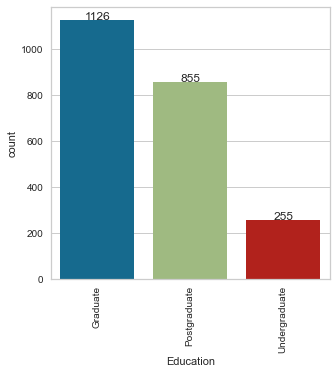

In [43]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Education', data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

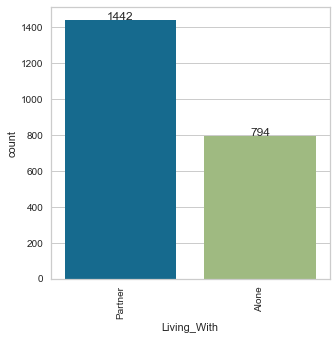

In [44]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Living_With', data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

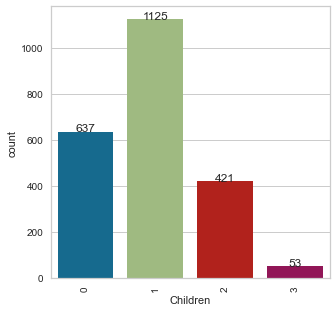

In [45]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Children', data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

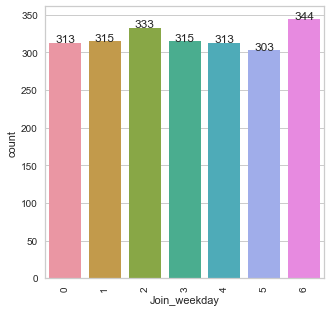

In [46]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Join_weekday', data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

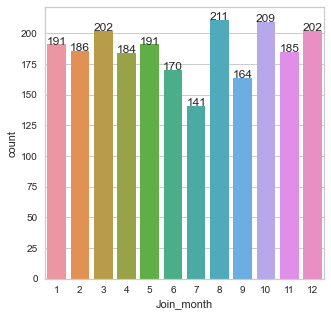

In [47]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Join_month', data=df_1)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

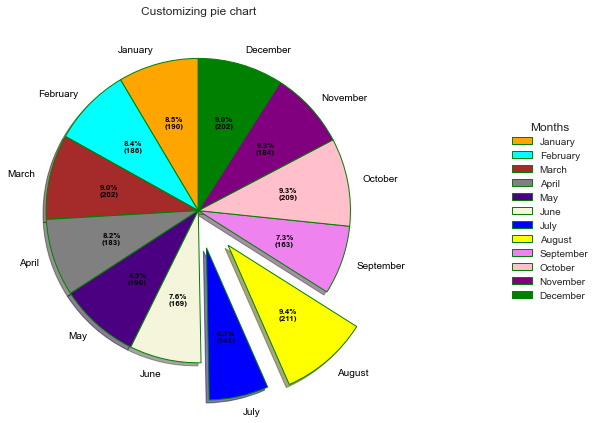

In [48]:
# Creating dataset
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

data = [191,187,202,184,191,170,141,211,164,209,185,202]


# Creating explode data
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.25,0.3,0.0,0.0,0.0,0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown","grey", "indigo", "beige","blue","yellow","violet","pink","purple","green")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
autopct = lambda pct: func(pct, data),
explode = explode,
labels = months,
shadow = True,
colors = colors,
startangle = 90,
wedgeprops = wp,
textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, months,
title ="Months",
loc ="center left",
bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")

# show plot
plt.show()


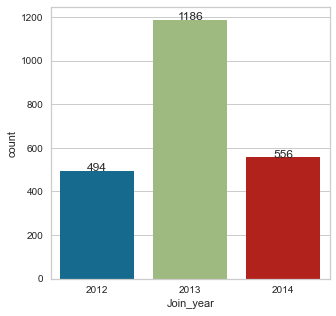

In [49]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Join_year', data=df_1)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<AxesSubplot:xlabel='Income', ylabel='Count'>

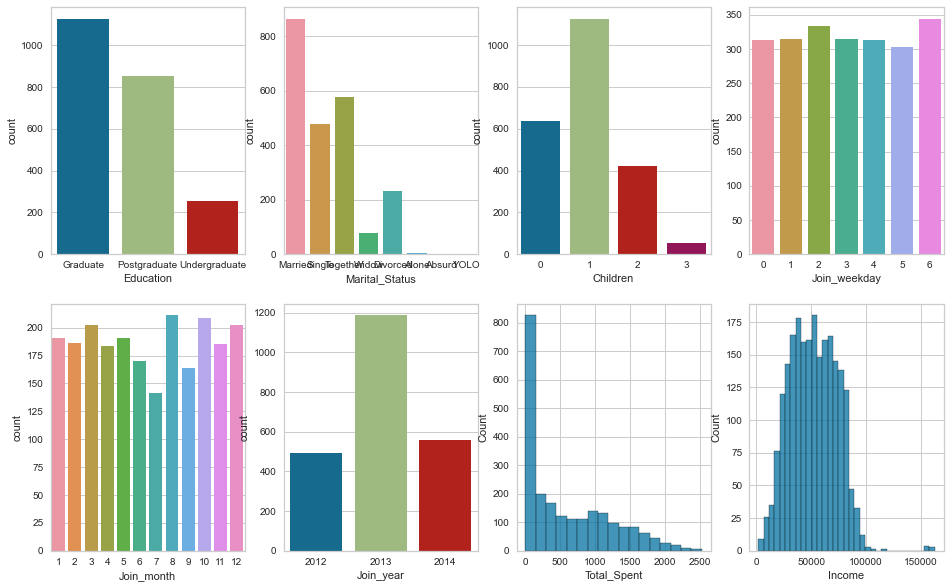

In [50]:
# Combined univariate analysis of each variables
fig,axes = plt.subplots(2,4, figsize=(16,10))
sns.countplot('Education',data=df_1,ax=axes[0,0])
sns.countplot('Marital_Status',data=df_1,ax=axes[0,1])
sns.countplot('Children',data=df_1,ax=axes[0,2])
sns.countplot('Join_weekday',data=df_1,ax=axes[0,3])
sns.countplot('Join_month',data=df_1,ax=axes[1,0])
sns.countplot('Join_year',data=df_1,ax=axes[1,1])

#sns.distplot(df_train['Fare'], kde=True,ax=axes[1,2])
sns.histplot(data=df_1,x="Total_Spent",ax=axes[1,2])
sns.histplot(data=df_1,x="Income",ax=axes[1,3] )


### Bivariate Analysis

We perform bi-variate analysis with 2 variables for any combination of categorical and continuous variables.
The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

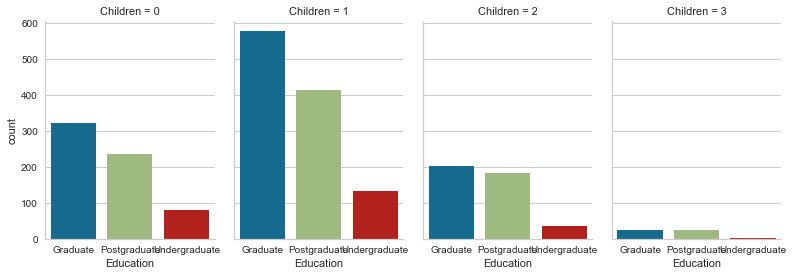

In [51]:
# Lets more elaborate customer behaviour with Education and Income --> use catplot or countplot
'''
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Education',hue="Minorhome",data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
'''

sns.catplot(x="Education",col="Children",data=df_1, kind="count",height=4, aspect =.7)

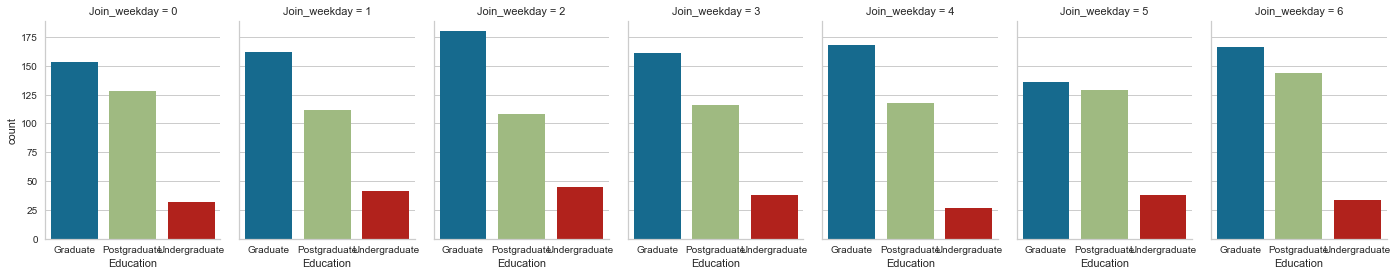

In [52]:
# Lets more elaborate customer behaviour with Education and Income --> use catplot or countplot

sns.catplot(x="Education",col="Join_weekday",data=df_1, kind="count",height=4, aspect =.7)

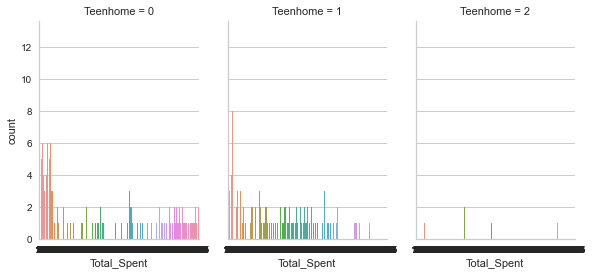

In [53]:
# Lets more elaborate customer behaviour with Teenhome and Total_Spent --> use catplot or countplot
'''
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Total_Spent',hue="Teenhome",data=new_df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
'''

sns.catplot(x="Total_Spent",col="Teenhome",data=df_1, kind="count",height=4, aspect =.7)

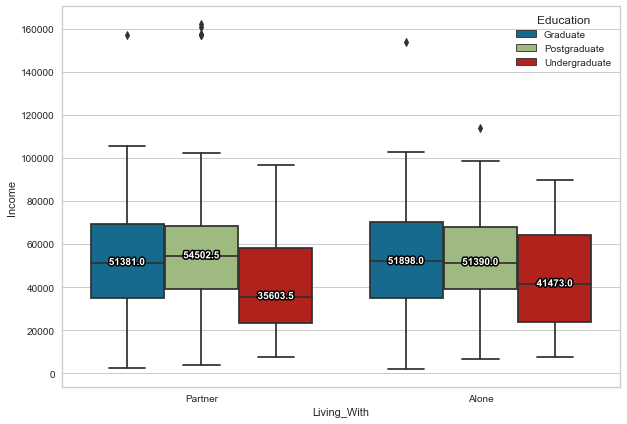

In [54]:
fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips = df_1
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='Living_With', y='Income', hue='Education', data=df_1,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()

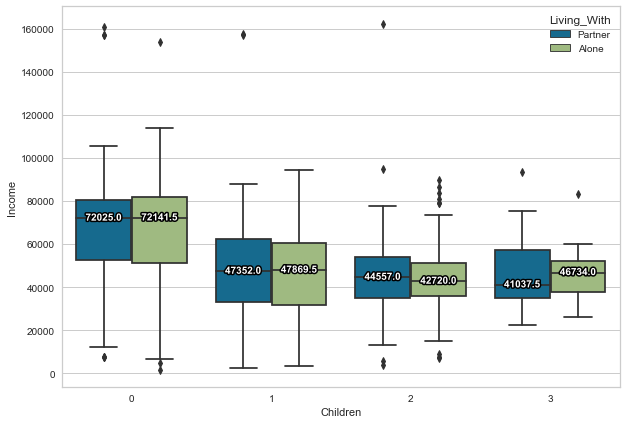

In [55]:
fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips = df_1
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='Children', y='Income', hue='Living_With', data=df_1,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()

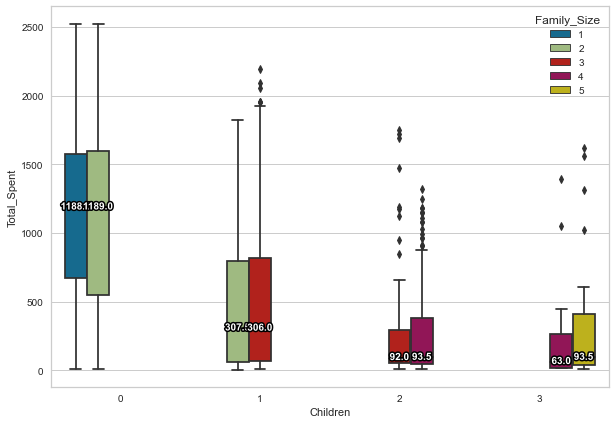

In [56]:
fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips = df_1
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='Children', y='Total_Spent', hue='Family_Size', data=df_1,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()

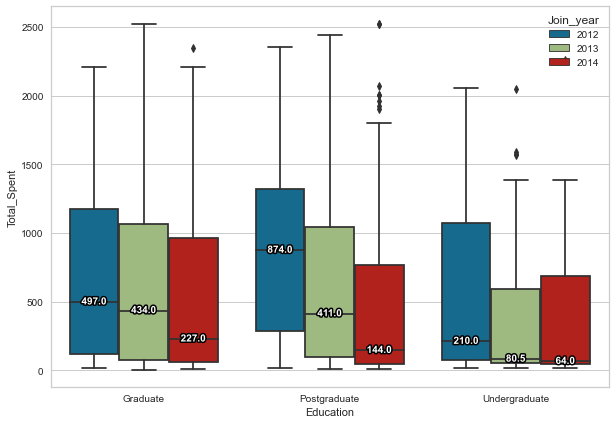

In [57]:
fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips = df_1
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='Education', y='Total_Spent', hue='Join_year', data=df_1,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()

In [58]:
education = df_1.Education.value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [59]:
df_1.loc[(df_1['Age'] >= 13) & (df_1['Age'] <= 19), 'AgeGroup'] = 'Teen'
df_1.loc[(df_1['Age'] >= 20) & (df_1['Age']<= 39), 'AgeGroup'] = 'Adult'
df_1.loc[(df_1['Age'] >= 40) & (df_1['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
df_1.loc[(df_1['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

In [60]:
children = df_1.Children.value_counts()

fig = px.pie(children, 
             values = children.values, 
             names = children.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

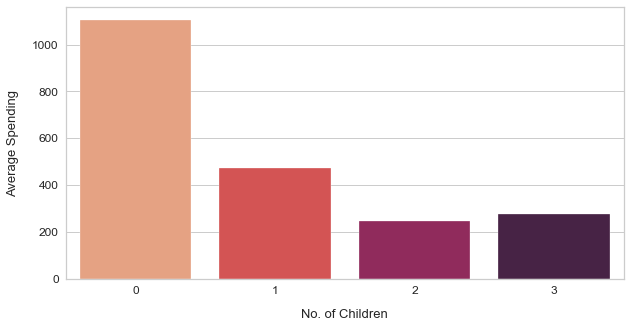

In [61]:
childrenspending = df_1.groupby('Children')['Total_Spent'].mean().sort_values(ascending=False)
childrenspending_df_1 = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(10,5))

sns.barplot(data=childrenspending_df_1,  x="No. of Children", y="Average Spending", palette='rocket_r');
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('No. of Children', fontsize=13, labelpad=13)
plt.ylabel('Average Spending', fontsize=13, labelpad=13);

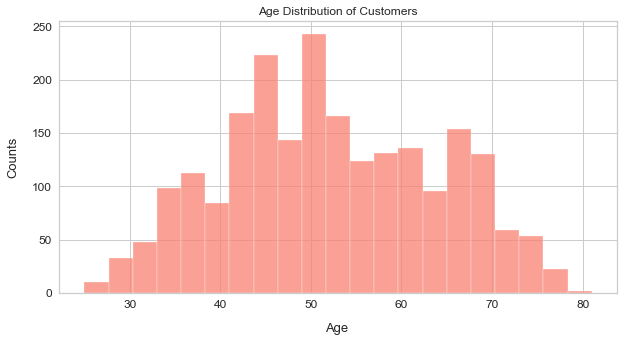

In [62]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = df_1.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Age ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

In [63]:
def find_IQR(df, column):
  q_25, q_75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
  IQR = q_75 - q_25
  whiskers_range = IQR * 1.5
  lower, upper = q_25 - whiskers_range, whiskers_range + q_75
  return lower, upper

In [64]:
lower_age, upper_age = find_IQR(df_1, "Age")
print(lower_age, upper_age)

17.0 89.0


In [65]:
lower_income, upper_income = find_IQR(df_1, "Income")
print(lower_income, upper_income)

-13657.375 117435.625


In [66]:
def find_IQR(df_1, column):
  q_25, q_75 = np.quantile(df_1[column], 0.25), np.quantile(df_1[column], 0.75)
  IQR = q_75 - q_25
  whiskers_range = IQR * 1.5
  lower, upper = q_25 - whiskers_range, whiskers_range + q_75
  return lower, upper

In [67]:
# Drop the outliers
df_1 = df_1[(df_1["Age"] < upper_age)]
df_1 = df_1[(df_1["Income"] < upper_income)]

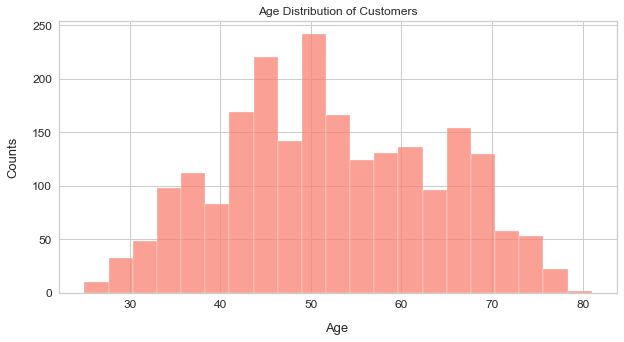

In [68]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = df_1.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Age ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

The age of customers is almost normally distributed, with the majority of customers between the ages of 40 and 60.

In [69]:
agegroup = df_1.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.4, 
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Age Groups', 
                                      x = 0.5, y = 0.5, font_size = 20, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

More than 50% of customers are Middle Age Adults between 40 and 60 The 2nd well-known age category is Adults, aged between 20 and 40

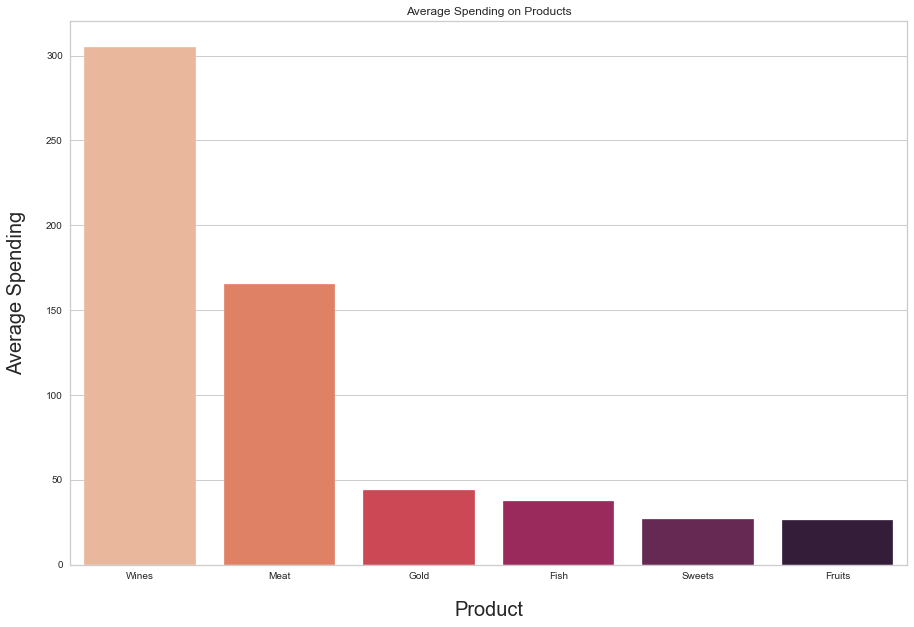

In [70]:
products = df_1[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df_1 = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(15,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df_1, x='Product', y='Average Spending', palette='rocket_r');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

### 4. Data Pre-processing

In [71]:
#Get list of categorical variables:

s = (df_1.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status', 'Living_With', 'AgeGroup']


In [72]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df_1[i]= df_1[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [73]:
df_1.sample(5)

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
1519  9451        1965          0               3   73538        0         1   
2118  8659        1952          1               5   69805        0         1   
49    2404        1976          0               3   53359        1         1   
100   5346        1973          2               3   23559        1         0   
906   9224        1972          1               4   55260        0         1   

     Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
1519  2012-11-25       92    811      76   428    99     137   107   
2118  2014-01-21       50    750      71   174    13      10    20   
49    2013-05-27        4    173       4    30     3       6    41   
100   2013-03-07       87     25       5    19     7       0    23   
906   2012-12-12       81    825       8    53    11       0   242   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1519                  3               10                    4   
2118                  2                6                    8   
49                    4                5                    1   
100                   3                3                    0   
906                   2                8                   10   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1519                  9                  7             0             0   
2118                 11                  2             0             0   
49                    4                  7             0             0   
100                   3                  7             0             0   
906                   5                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
1519             0             0             0         0         0   56   
2118             0             0             0         0         0   69   
49               0             0             0         0         0   45   
100              0             0             0         0         0   48   
906              0             0             0         0         0   49   

      Total_Spent  Living_With  Children  Family_Size  Is_Parent  Join_year  \
1519         1658            1         1            3          1       2012   
2118         1038            1         1            3          1       2014   
49            257            1         2            4          1       2013   
100            79            1         1            3          1       2013   
906          1139            0         1            2          1       2012   

      Join_month  Join_weekday  Total_num_purchase  Total_accept  AgeGroup  
1519          11             6                  33             0         1  
2118           1             1                  29             0         2  
49             5             0                  21             0         1  
100            3             3                  16             0         1  
906           12             2                  31             0         1

Wine and Meat Products are the most famous products among customers Candy and Fruits are not often bought

In [ ]:
df_clust = df_1.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome','Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                         'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                        'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response'], axis=1)

In [ ]:
df_clust.sample(5)

In [ ]:
df_1.sample(5)

In [ ]:
# model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(df_1)

# preds = model.predict(X)

# customer_kmeans = X.copy()
# customer_kmeans['clusters'] = preds

In [ ]:
#Income
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=50, labelpad=20);

In [ ]:
#Total Spending
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Total_Spent',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=50, labelpad=20);


In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=50, labelpad=20);

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Children',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('No. of Children', fontsize=50, labelpad=20);


### From the above analysis we can group customers into 4 groups based on their income and total expenses:

### Platinum: Highest income and highest expense

### Gold: High earners and high spenders

### Silver: The one with lower salary and less expenses

### Bronze: The one with the lowest salary and least expenses

### 4. Data Pre-processing

In [ ]:
#Get list of categorical variables:

s = (df_1.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df_1[i]= df_1[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

In [ ]:
df_1.sample(5)

In [ ]:
#Creating a copy of data
df_std = df_1.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Dt_Customer']
df_std = df_std.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(df_std)
scaled_df_std = pd.DataFrame(scaler.transform(df_std),columns= df_std.columns )
print("All features are now scaled")

In [ ]:
#Scaled data to be used for reducing the dimensionality

print("Dataframe to be used for further modelling:")
scaled_df_std.sample(5)

In [ ]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(cl)

customer_kmeans = cl.copy()
customer_kmeans['clusters'] = preds

### 5. Dimensional Reduction

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df_std)
PCA_ds = pd.DataFrame(pca.transform(scaled_df_std), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="1") # c="colour of points" and marker = "shape of the points ex: circle,square.etc"
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()




In [ ]:

#Ploting result data with the use of scatterplot. plotly
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color='green',opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of size-reduced data",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

### 6. Clustering

#### 6.1 Elbow Method --> to determine no. of clusters

In [ ]:
# Elbow method:

fig = plt.figure(figsize=(13,7))
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
X = df_2.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome','Dt_Customer', 'Z_CostContact','Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response'], axis=1)

In [ ]:
X.sample(5)

In [ ]:
X.columns

In [ ]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

In [ ]:
#Initiating the Agglomerative Clustering model with k = 4
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_1["Clusters"]= yhat_AC

In [ ]:
df_1.sample(3)

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
colors = ListedColormap(['r','g','b','y'])
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='1', cmap = colors )
ax.set_title("The Plot Of The Clusters")
plt.show()




In [ ]:
#Ploting result data with the use of scatterplot. plotly
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

 
fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color=x,opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of size-reduced data",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

### Visualizing the Clusters

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_2["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
pl = sns.scatterplot(data= df_2,x=df_2["Total_Spent"], y=df_2["Income"],hue=df_2["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


In [ ]:
#Creating a feature to get a sum of accepted promotions 
df_2["Total_Promos"] = df_2["AcceptedCmp1"]+ df_2["AcceptedCmp2"]+ df_2["AcceptedCmp3"]+ df_2["AcceptedCmp4"]+ df_2["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df_2["Total_Promos"],hue=df_2["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [ ]:
Personal = [ "Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure(figsize=(20,10))
    sns.barplot(x=df_2[i], y=df_2["Total_Spent"], hue =df_2["Clusters"], palette=pal)
    plt.show()

In [ ]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= df_2.iloc[:,[2,26]].values

In [ ]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

In [ ]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
df_2.sample(3)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
#Total spendings on various items
df_2["Total_Purchases"] = df_2["NumDealsPurchases"]+ df_2["NumWebPurchases"]+ df_2["NumCatalogPurchases"]+ df_2["NumStorePurchases"]+ df_2["NumWebVisitsMonth"]


In [ ]:
df_2.sample(3)

In [ ]:
df_model = df_2[['Education','Income','Living_With','Recency','Age','Total_Spent','Family_Size','Total_Promos','Total_Purchases']].copy()

In [ ]:
df_model.sample(3)

In [ ]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(df_model)
    silhouette_scores.append(silhouette_score(df_model, m1.fit_predict(df_model))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

#### Here we are using the Silhouette Score --> to measure the value of k

In [ ]:
silhouette_scores

In [ ]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [ ]:
bb

In [ ]:
#Creating a copy of data
df_std = df_1.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Dt_Customer']
df_std = df_std.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(df_std)
scaled_df_std = pd.DataFrame(scaler.transform(df_std),columns= df_std.columns )
print("All features are now scaled")

In [ ]:
#Scaled data to be used for reducing the dimensionality

print("Dataframe to be used for further modelling:")
scaled_df_std.sample(5)